# Teifi catchment
# 1. MLP

# Hyperparameter tuning using model_builder function from tensorflow   (Standard normalization)
(After midterm)
#(https://www.tensorflow.org/tutorials/keras/keras_tuner)

In [300]:
import numpy as np
import pandas as pd

### define file path
path = 'Teifi_R and Q with lag.csv'  ####### This excel data is not scaled/normalized

## Read CSV file and convert it to dataframe

df = pd.read_csv( path, sep = ',', header = 'infer')


In [301]:
df

,Date,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
0,09/10/2000,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,12.9,70.30
1,10/10/2000,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,73.51
2,11/10/2000,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,96.17
3,12/10/2000,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,132.60
4,13/10/2000,2.7,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,119.70
...,...,...,...,...,...,...,...,...,...,...,...
3639,26/09/2010,0.0,0.0,0.3,9.5,17.1,0.0,0.1,0.9,0.5,17.29
3640,27/09/2010,0.0,0.0,0.0,0.3,9.5,17.1,0.0,0.1,0.9,15.30
3641,28/09/2010,14.1,0.0,0.0,0.0,0.3,9.5,17.1,0.0,0.1,14.28
3642,29/09/2010,0.2,14.1,0.0,0.0,0.0,0.3,9.5,17.1,0.0,23.13


In [302]:
df = df.set_index('Date')
print(df)

              Rt  R_t_1  R_t_2  R_t_3  R_t_4  R_t_5  R_t_6  R_t_7  R_t_8  \
Date                                                                       
09/10/2000  15.7   11.8    1.6    2.8    1.1    7.7    7.7    2.9   12.9   
10/10/2000  21.4   15.7   11.8    1.6    2.8    1.1    7.7    7.7    2.9   
11/10/2000  10.3   21.4   15.7   11.8    1.6    2.8    1.1    7.7    7.7   
12/10/2000  21.9   10.3   21.4   15.7   11.8    1.6    2.8    1.1    7.7   
13/10/2000   2.7   21.9   10.3   21.4   15.7   11.8    1.6    2.8    1.1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
26/09/2010   0.0    0.0    0.3    9.5   17.1    0.0    0.1    0.9    0.5   
27/09/2010   0.0    0.0    0.0    0.3    9.5   17.1    0.0    0.1    0.9   
28/09/2010  14.1    0.0    0.0    0.0    0.3    9.5   17.1    0.0    0.1   
29/09/2010   0.2   14.1    0.0    0.0    0.0    0.3    9.5   17.1    0.0   
30/09/2010  13.3    0.2   14.1    0.0    0.0    0.0    0.3    9.5   17.1   

           

In [303]:
df.describe()

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,3.992179,3.991767,3.992151,3.989050,3.989352,3.991465,3.993578,3.994292,3.995225,30.440950
std,6.542103,6.541564,6.541383,6.539268,6.539109,6.539064,6.539018,6.538756,6.539785,34.149581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.120500
50%,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,18.020000
75%,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,40.450000
max,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,373.000000


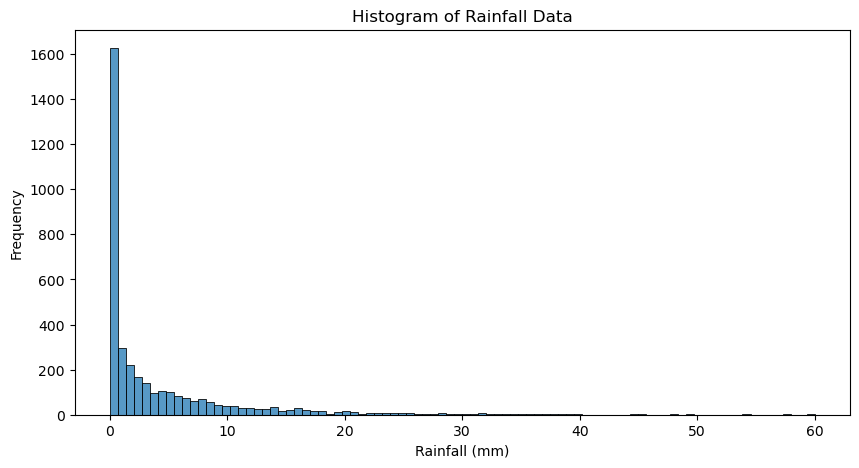

In [304]:
#### visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# Plot the distribution of rainfall data as a histogram
sns.histplot(df["Rt"], kde=False)

# Add labels and title to the plot
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Histogram of Rainfall Data")
# plt.xlim(0, 80)
# plt.ylim(0, 300)
plt.show()

# 1. Data splitting

##  Train, Validation and Test data 
###  70% train (2550 data points)
###  15% train (547 data points)
###  15% train (547 data points)

In [305]:
df_train = df.iloc[:2550]

df_val = df.iloc[2550:3097] 

# df_test = df.iloc[3097:] 
df_test = df.tail(547).iloc[:]   ## gives the same result as the above line of code

In [306]:
df_train

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
Date,,,,,,,,,,
09/10/2000,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,12.9,70.300
10/10/2000,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,73.510
11/10/2000,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,96.170
12/10/2000,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,132.600
13/10/2000,2.7,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,119.700
...,...,...,...,...,...,...,...,...,...,...
28/09/2007,0.5,0.0,0.7,7.5,5.6,26.1,2.4,6.0,4.9,15.180
29/09/2007,0.5,0.5,0.0,0.7,7.5,5.6,26.1,2.4,6.0,12.430
30/09/2007,1.1,0.5,0.5,0.0,0.7,7.5,5.6,26.1,2.4,10.660


# 2. Normalization

In [307]:
import pandas as pd
import numpy as np

### General function for all the normalization methods

def normalize_df(data, norm_method):     

    ## Normalize data using specified method
 
    if norm_method == 'minmax':
        # Min-Max normalization
        data_n = (data - data.min()) / (data.max() - data.min())
    elif norm_method == 'zscore':
        # Z-score normalization
        mean = data.mean()
        std = data.std()
        data_n = (data - mean) / std
    elif norm_method == 'max':
        # Max normalization
        data_n = 1 - ((data.max() - data)/data.max())
    else:
        raise ValueError("Invalid normalization method. Choose from: 'minmax', 'zscore', 'max'")
    return data_n



### Standard normalization  (Data sets for training, validation and testing are nromalized separately)

In [308]:
## Z_score(standard)
df_train_norm = normalize_df(df_train, 'zscore')
df_val_norm = normalize_df(df_val, 'zscore')
df_test_norm = normalize_df(df_test, 'zscore')

In [309]:
###example
df_train_norm.describe()

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
count,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03
mean,-2.099671e-15,-2.549943e-15,-1.856685e-15,-2.574847e-15,-2.324807e-15,-2.219924e-15,-2.402566e-15,-2.379970e-15,-2.489621e-15,1.455045e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.082633e-01,-6.088429e-01,-6.089583e-01,-6.090787e-01,-6.091250e-01,-6.095501e-01,-6.100155e-01,-6.101733e-01,-6.103107e-01,-8.089168e-01
25%,-6.082633e-01,-6.088429e-01,-6.089583e-01,-6.090787e-01,-6.091250e-01,-6.095501e-01,-6.100155e-01,-6.101733e-01,-6.103107e-01,-6.712789e-01
50%,-4.413379e-01,-4.343651e-01,-4.268866e-01,-4.270013e-01,-4.270444e-01,-4.274705e-01,-4.279337e-01,-4.280835e-01,-4.282758e-01,-3.507176e-01
75%,1.808389e-01,1.801004e-01,1.800189e-01,1.799234e-01,1.798909e-01,1.794615e-01,1.903855e-01,1.902630e-01,1.898844e-01,2.884958e-01
max,8.496762e+00,8.494350e+00,8.494624e+00,8.494792e+00,8.494905e+00,8.494430e+00,8.494071e+00,8.494315e+00,8.491435e+00,9.760296e+00


In [310]:
### convert the dataframes to numpy arrays

df_train_f = df_train_norm.to_numpy()

df_val_f = df_val_norm.to_numpy()

df_test_f = df_test_norm.to_numpy()

In [311]:
### Define input and output sequences (list of sub sequences)

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1] 
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_in, n_steps_out = 1, 1    #### 1 input sequences and 1 output sequences



### Split into input and target variables

In [312]:
#### Training data


X_train, y_train = split_sequences(df_train_f, n_steps_in, n_steps_out)
print(X_train.shape, y_train.shape)

# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features = 9   ## 9 rainfall inputs

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)


(2550, 1, 9) (2550, 1)
(2550, 1, 9)


In [313]:
#### validation data

X_val, y_val = split_sequences(df_val_f , n_steps_in, n_steps_out)


X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

### reshape

X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

print(X_val.shape, y_val.shape)


(547, 1, 9) (547, 1)


In [314]:
#### Test data

X_test, y_test = split_sequences(df_test_f , n_steps_in, n_steps_out)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

print(X_test.shape, y_test.shape)


(547, 1, 9) (547, 1)


In [315]:
#### model fitting
import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import save_model

from tensorflow.keras import initializers

from tensorflow.keras import layers


## Hyperparameter tuning using KerasTuner

In [316]:

import keras_tuner as kt


from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner.engine.hyperparameters import Choice,Float

### a. Define model (Using model_buider function)
### (https://www.tensorflow.org/tutorials/keras/keras_tuner)
## MLP

In [317]:

def model_buider(hp):
    
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape = (n_steps_in, n_features)))   ### flattening is important when using this function
 ###1. Tune the number of units in the first Dense layer
     
    hp_units = hp.Int('units', min_value = 1, max_value = 10, step = 1)
    
###2. Tune the activation function

    hp_activation = hp.Choice("activation", ["relu", "tanh", "sigmoid"])
    
###3. Tune the weight initialization
    hp_initializer=hp.Choice('weight_init', ['he_uniform', 'glorot_uniform', 'random_normal' , 'lecun_normal'])  ##
    
       ### Fix the seeds for reproducibility purposes   
        
    if hp_initializer == 'he_uniform':
        init = tf.keras.initializers.he_uniform(seed=1)
    elif hp_initializer == 'glorot_uniform':
        init = tf.keras.initializers.glorot_uniform(seed=1)
    elif hp_initializer == 'random_normal':
        init = tf.keras.initializers.RandomNormal(seed=1)
    else:
        init = tf.keras.initializers.lecun_normal(seed=1)
    
###4. Tune the number of layers
###5. Tune dropout rate

    for i in range(hp.Int("num_layers", 1, 3)):
        
        model.add(keras.layers.Dense(units = hp_units, activation = hp_activation, kernel_initializer = init))
        model.add(Dropout(hp.Float('dropout_rate', 0, 0.3, step=0.1)))
    ### Output layer
   
    model.add(keras.layers.Dense(1, kernel_initializer = init))
    model.add(Dropout(hp.Float('dropout_rate', 0, 0.3, step=0.1)))
###6. Tune the optimizer 

    hp_optimizer = hp.Choice("optimizer", ['Adam', 'SGD', 'RMSprop'])

    model.compile (
                    optimizer = hp_optimizer, ##(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))###
                  
                    loss='mean_squared_error',
                   
                    metrics=[tf.keras.metrics.MeanSquaredError()])
    
  
    return model

    
 

### b.  Instantiate the tuner and perform hypertuning

In [318]:
#### Hyperband tuner ( it is a class)

tuner = kt.Hyperband(model_buider,
                     
                     objective= 'mean_squared_error',  ### should be the same as the loss funtion used when compiling
                     
                     max_epochs = 50,
                     
                     factor = 2,  
                     
                     seed = 10,
                     
                     directory='Exhaustive_Opt_norm',
                     
                     project_name='Teifi_ml_test_4')

In [319]:
### Create a callback to stop training early after reaching a certain value for the validation loss.

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [320]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [321]:
from keras.callbacks import TensorBoard

import datetime, os
log_dir = "Exhaustive_Opt_norm/Teifi_test_1" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### C. Run hyperparameter search 

# 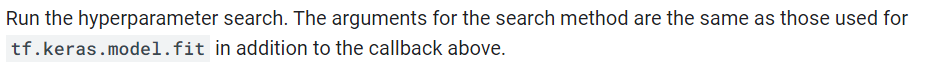

In [322]:
tuner.search(X_train, y_train, 
             epochs=100, 
             validation_data=(X_val, y_val), 
             callbacks=[stop_early,tb])

Trial 186 Complete [00h 00m 26s]
mean_squared_error: 0.34358564019203186

Best mean_squared_error So Far: 0.1853114515542984
Total elapsed time: 00h 20m 54s
INFO:tensorflow:Oracle triggered exit


In [323]:
tuner.results_summary()

Results summary
Results in Exhaustive_Opt_norm\Teifi_ml_test_4
Showing 10 best trials
Trial summary
Hyperparameters:
units: 9
activation: relu
weight_init: lecun_normal
num_layers: 1
dropout_rate: 0.0
optimizer: RMSprop
tuner/epochs: 50
tuner/initial_epoch: 25
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0160
Score: 0.1853114515542984
Trial summary
Hyperparameters:
units: 8
activation: relu
weight_init: glorot_uniform
num_layers: 2
dropout_rate: 0.0
optimizer: SGD
tuner/epochs: 50
tuner/initial_epoch: 25
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0072
Score: 0.1866440325975418
Trial summary
Hyperparameters:
units: 10
activation: relu
weight_init: he_uniform
num_layers: 3
dropout_rate: 0.0
optimizer: RMSprop
tuner/epochs: 50
tuner/initial_epoch: 25
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0168
Score: 0.1870981603860855
Trial summary
Hyperparameters:
units: 6
activation: relu
weight_init: he_uniform
num_layers: 3
dropout_rate: 0.0
optimizer: RMSprop
tuner/epochs: 50
tuner/

### steps in tensorboard

In [324]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [325]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## d.  get the optimal hyperparameters

In [326]:

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. 

The optimal number of units in the first densely-connected layer is {best_hps.get('units')}, 
The optimal activation function is {best_hps.get('activation')},
The optimal weight initialization is {best_hps.get('weight_init')}
The optimal optimizer is {best_hps.get('optimizer')}.
The optimal number of layers is {best_hps.get('num_layers')},
The optimal dropout rate is {best_hps.get('dropout_rate')},

""")




The hyperparameter search is complete. 

The optimal number of units in the first densely-connected layer is 9, 
The optimal activation function is relu,
The optimal weight initialization is lecun_normal
The optimal optimizer is RMSprop.
The optimal number of layers is 1,
The optimal dropout rate is 0.0,




## e. Train the model using the best model

In [327]:
model = tuner.hypermodel.build(best_hps)


In [328]:
### model training 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
mlp_amt_1 = model.fit(X_train, y_train, epochs=500, validation_data = (X_val, y_val), shuffle = 0, callbacks=[early_stopping])


Epoch 1/500
80/80 [==============================] - 1s 8ms/step - loss: 1.1297 - mean_squared_error: 1.1297 - val_loss: 0.9647 - val_mean_squared_error: 0.9647
Epoch 2/500
80/80 [==============================] - 0s 4ms/step - loss: 0.8743 - mean_squared_error: 0.8743 - val_loss: 0.7627 - val_mean_squared_error: 0.7627
Epoch 3/500
80/80 [==============================] - 0s 4ms/step - loss: 0.7160 - mean_squared_error: 0.7160 - val_loss: 0.6294 - val_mean_squared_error: 0.6294
Epoch 4/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6124 - mean_squared_error: 0.6124 - val_loss: 0.5385 - val_mean_squared_error: 0.5385
Epoch 5/500
80/80 [==============================] - 0s 4ms/step - loss: 0.5409 - mean_squared_error: 0.5409 - val_loss: 0.4738 - val_mean_squared_error: 0.4738
Epoch 6/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4859 - mean_squared_error: 0.4859 - val_loss: 0.4254 - val_mean_squared_error: 0.4254
Epoch 7/500
80/80 [===============

## Plot training and validation errors

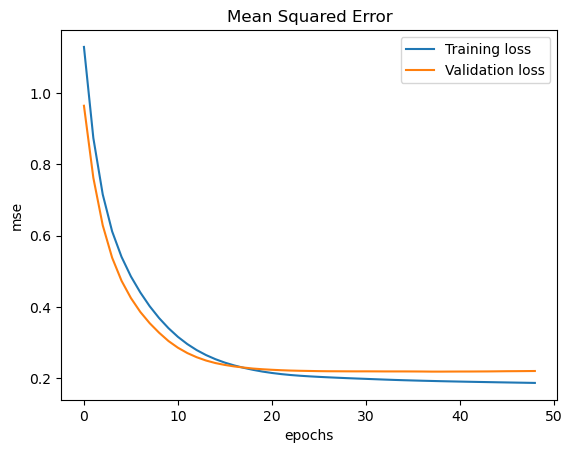

In [329]:
plt.plot(mlp_amt_1.history['mean_squared_error'], label = 'Training loss')
plt.plot(mlp_amt_1.history['val_mean_squared_error'], label = 'Validation loss')
plt.title('Mean Squared Error')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()

In [330]:
model.summary()   #### this shows us that the number of layers are 3 in this MLP model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 9)                 0         
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


## f. Test best model

In [331]:
eval_result = model.evaluate(X_test, y_test)
# eval_result = hypermodel.evaluate(X_test, y_test)

print("[test loss, test accuracy]:", eval_result)

18/18 [==============================] - 0s 4ms/step - loss: 0.2428 - mean_squared_error: 0.2428
[test loss, test accuracy]: [0.242751345038414, 0.242751345038414]


In [332]:
Y_pred = model.predict(X_test)   ### when using early stopping
# Y_pred = hypermodel.predict(X_test)   

18/18 [==============================] - 0s 5ms/step


In [333]:
Y_pred

array([[-0.27564934],
       [-0.42463607],
       [-0.46951795],
       [-0.608995  ],
       [-0.60794896],
       [-0.58956915],
       [-0.44033614],
       [-0.45626637],
       [-0.16578643],
       [-0.20501992],
       [-0.28862   ],
       [-0.3742473 ],
       [-0.18032882],
       [-0.258385  ],
       [-0.31959578],
       [-0.4846564 ],
       [-0.63935643],
       [-0.51846087],
       [-0.53098565],
       [-0.46347472],
       [-0.546932  ],
       [-0.46526414],
       [-0.43010503],
       [-0.63408864],
       [-0.6102113 ],
       [-0.3395688 ],
       [-0.45739645],
       [-0.04768024],
       [ 0.01886435],
       [-0.26006788],
       [-0.1320819 ],
       [-0.23502883],
       [-0.17743158],
       [-0.40419272],
       [-0.31355107],
       [-0.32203722],
       [-0.4615416 ],
       [-0.46056056],
       [-0.5197119 ],
       [-0.56375486],
       [-0.49354786],
       [-0.5170643 ],
       [-0.48541778],
       [-0.02382327],
       [ 0.69608   ],
       [ 1

In [334]:
y_test

array([[-0.56212305],
       [-0.57290687],
       [-0.57818475],
       [-0.5882844 ],
       [-0.58369069],
       [-0.51338408],
       [-0.42525648],
       [-0.4581618 ],
       [-0.44578158],
       [-0.46532929],
       [-0.51706557],
       [-0.53729745],
       [-0.54394367],
       [-0.55342431],
       [-0.53309469],
       [-0.49986358],
       [-0.49627984],
       [-0.54475816],
       [-0.56886701],
       [-0.58202913],
       [-0.58880567],
       [-0.59567995],
       [-0.60297776],
       [-0.59861211],
       [-0.57404715],
       [-0.34380768],
       [-0.40114764],
       [-0.43991727],
       [-0.2613815 ],
       [-0.3356628 ],
       [-0.41352786],
       [-0.44610738],
       [-0.46044236],
       [-0.47640633],
       [-0.48878655],
       [-0.4988862 ],
       [-0.49953779],
       [-0.52403759],
       [-0.54381336],
       [-0.56495746],
       [-0.5844726 ],
       [-0.59056497],
       [-0.56036375],
       [ 0.07842289],
       [ 0.11784411],
       [ 0

In [335]:
y_test.shape

(547, 1)

In [336]:
print(y_test[:,:-1].shape)   
print(y_test[:,1:2].shape)

(547, 0)
(547, 0)


In [337]:
y_test[:,-1:]    ##### all rows and all columns including -1(which is the last column)

array([[-0.56212305],
       [-0.57290687],
       [-0.57818475],
       [-0.5882844 ],
       [-0.58369069],
       [-0.51338408],
       [-0.42525648],
       [-0.4581618 ],
       [-0.44578158],
       [-0.46532929],
       [-0.51706557],
       [-0.53729745],
       [-0.54394367],
       [-0.55342431],
       [-0.53309469],
       [-0.49986358],
       [-0.49627984],
       [-0.54475816],
       [-0.56886701],
       [-0.58202913],
       [-0.58880567],
       [-0.59567995],
       [-0.60297776],
       [-0.59861211],
       [-0.57404715],
       [-0.34380768],
       [-0.40114764],
       [-0.43991727],
       [-0.2613815 ],
       [-0.3356628 ],
       [-0.41352786],
       [-0.44610738],
       [-0.46044236],
       [-0.47640633],
       [-0.48878655],
       [-0.4988862 ],
       [-0.49953779],
       [-0.52403759],
       [-0.54381336],
       [-0.56495746],
       [-0.5844726 ],
       [-0.59056497],
       [-0.56036375],
       [ 0.07842289],
       [ 0.11784411],
       [ 0

## Evaluation metics

In [338]:
###nse

import hydroeval as he
nse = he.evaluator(he.nse, Y_pred, y_test[:,-1:]  )
print(nse)

[0.75680404]


In [339]:
##rmse
rmse = he.evaluator(he.rmse, Y_pred, y_test[:,-1:]  )
print(rmse)

[0.49269804]


In [340]:
###logrmse
from sklearn.metrics import mean_squared_error
#### log of predicted values
y_pred_lg = np.log1p(Y_pred)

#### log of test values
y_test_lg = np.log1p(y_test[:,-1:])


In [341]:
##calculate mse
mse = mean_squared_error(y_pred_lg, y_test_lg)
rmse_lg = np.sqrt(mse)   
print(rmse_lg)

0.4271424664660639


## g. plot

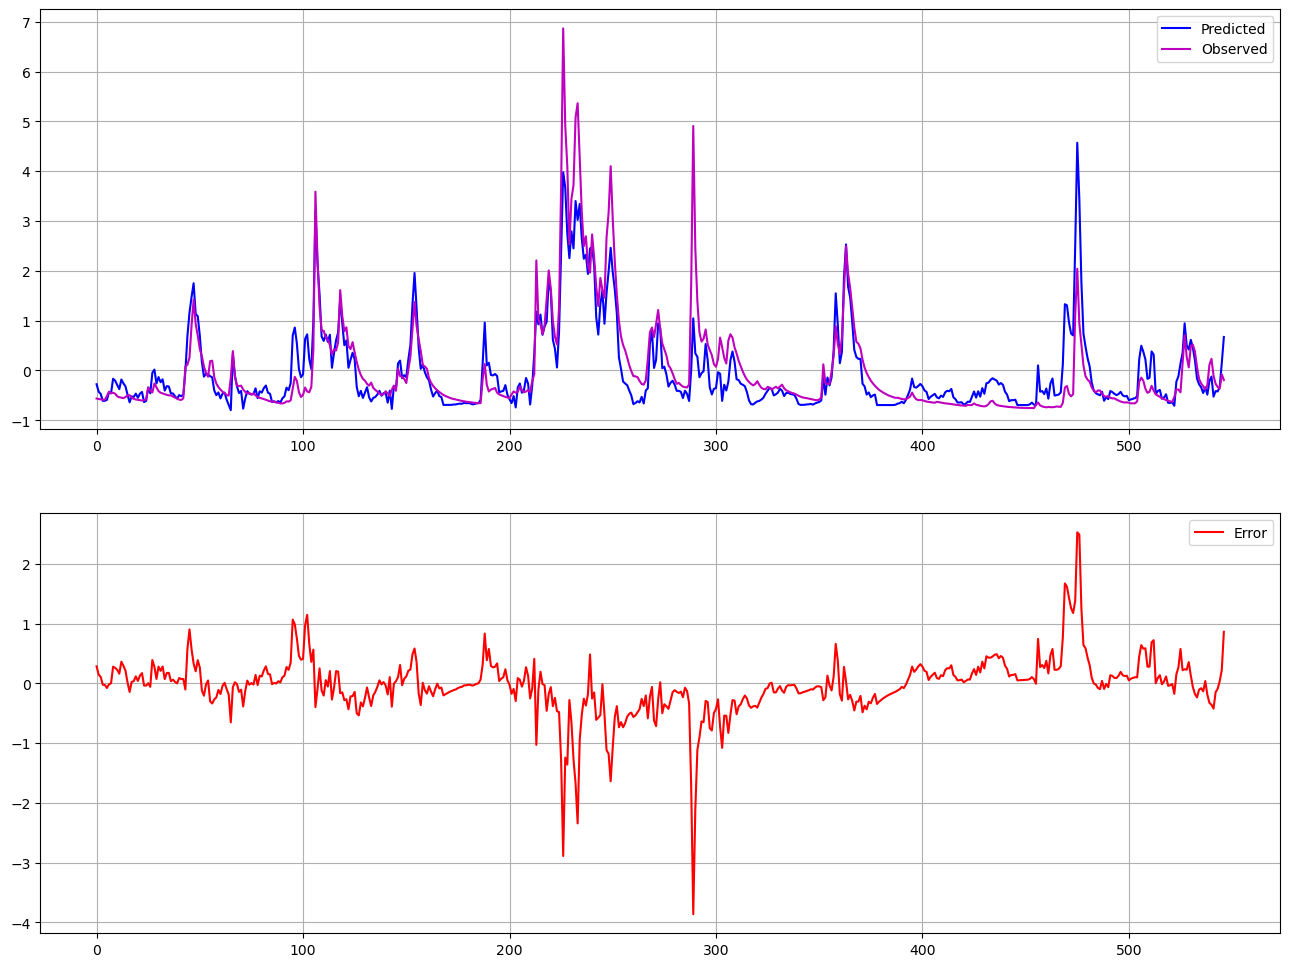

In [342]:
import matplotlib.pyplot as plt
# plt.plot(Q_pred)
# plt.plot(y_test)

plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)

plt.plot(Y_pred[:,-1],'b', label = "Predicted")

plt.plot(y_test[:,-1], 'm',  label = "Observed")  

plt.legend()
plt.grid()

plt.subplot(2,1,2)

plt.plot(Y_pred[:,-1] - y_test[:,-1],'r', label = "Error")

plt.legend()

plt.grid()

##  save_model

## h. Denormalize the data

In [343]:
#### Original data
df_train_norm

# df_val_f

# df_test_f

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
Date,,,,,,,,,,
09/10/2000,1.774218,1.181452,-0.366196,-0.184231,-0.442218,0.558794,0.558342,-0.170123,1.346565,1.134868
10/10/2000,2.639196,1.773159,1.181413,-0.366309,-0.184270,-0.442644,0.558342,0.558236,-0.170393,1.226337
11/10/2000,0.954766,2.637962,1.773146,1.181349,-0.366351,-0.184698,-0.443107,0.558236,0.557747,1.872033
12/10/2000,2.715071,0.953872,2.637986,1.773101,1.181334,-0.366777,-0.185158,-0.443258,0.557747,2.910104
13/10/2000,-0.198537,2.713822,0.953823,2.637969,1.773096,1.180899,-0.367240,-0.185297,-0.443445,2.542519
...,...,...,...,...,...,...,...,...,...,...
28/09/2007,-0.532388,-0.608843,-0.502750,0.528905,0.240584,3.350681,-0.245852,0.300276,0.132999,-0.435775
29/09/2007,-0.532388,-0.532983,-0.608958,-0.502867,0.528879,0.240155,3.350262,-0.245994,0.299864,-0.514136
30/09/2007,-0.441338,-0.532983,-0.533095,-0.609079,-0.502911,0.528447,0.239699,3.350279,-0.246241,-0.564572


In [344]:
### normalized data after model training
Y_pred    #### model out put
# y_obser = y_test[:,-1:]      ## observed discharge

array([[-0.27564934],
       [-0.42463607],
       [-0.46951795],
       [-0.608995  ],
       [-0.60794896],
       [-0.58956915],
       [-0.44033614],
       [-0.45626637],
       [-0.16578643],
       [-0.20501992],
       [-0.28862   ],
       [-0.3742473 ],
       [-0.18032882],
       [-0.258385  ],
       [-0.31959578],
       [-0.4846564 ],
       [-0.63935643],
       [-0.51846087],
       [-0.53098565],
       [-0.46347472],
       [-0.546932  ],
       [-0.46526414],
       [-0.43010503],
       [-0.63408864],
       [-0.6102113 ],
       [-0.3395688 ],
       [-0.45739645],
       [-0.04768024],
       [ 0.01886435],
       [-0.26006788],
       [-0.1320819 ],
       [-0.23502883],
       [-0.17743158],
       [-0.40419272],
       [-0.31355107],
       [-0.32203722],
       [-0.4615416 ],
       [-0.46056056],
       [-0.5197119 ],
       [-0.56375486],
       [-0.49354786],
       [-0.5170643 ],
       [-0.48541778],
       [-0.02382327],
       [ 0.69608   ],
       [ 1

In [345]:
def denormalize(data, original_data, type='min_max'):   ### default is min-max in this case(there is no reason behind this)

    if type == 'min_max':
        min = np.min(original_data)
        max = np.max(original_data)
        data = data * (max - min) + min
    elif type == 'z_score':
        mean = np.mean(original_data)
        std = np.std(original_data)
        data = data * std + mean
    elif type == 'max':                
        max = np.max(original_data)
        data = data * max
    else:
        raise ValueError("Invalid normalization type. Choose either 'max', 'min_max', or 'z_score'.")
    return data

In [346]:
Y_observ_unnorm = df_test['Qt']

In [347]:
Y_observ_unnorm = Y_observ_unnorm.to_numpy()

###  denormalized predicted discharge

In [348]:
### Standard denormalization (becasue we used standard(z-score) in this experiment)

Y_pred_denorm = denormalize(Y_pred, Y_observ_unnorm, type='z_score')

In [349]:
print(Y_pred_denorm)
print(Y_pred_denorm.shape)

[[ 17.009798 ]
 [ 12.440963 ]
 [ 11.064612 ]
 [  6.7873993]
 [  6.819479 ]
 [  7.383114 ]
 [ 11.959503 ]
 [ 11.470985 ]
 [ 20.37886  ]
 [ 19.175724 ]
 [ 16.61204  ]
 [ 13.986187 ]
 [ 19.932903 ]
 [ 17.539227 ]
 [ 15.662134 ]
 [ 10.600375 ]
 [  5.8563347]
 [  9.563725 ]
 [  9.17964  ]
 [ 11.249934 ]
 [  8.690628 ]
 [ 11.19506  ]
 [ 12.273251 ]
 [  6.0178776]
 [  6.750101 ]
 [ 15.049641 ]
 [ 11.436331 ]
 [ 24.000711 ]
 [ 26.041372 ]
 [ 17.487621 ]
 [ 21.412445 ]
 [ 18.25547  ]
 [ 20.02175  ]
 [ 13.06788  ]
 [ 15.847502 ]
 [ 15.587265 ]
 [ 11.309216 ]
 [ 11.3393   ]
 [  9.525361 ]
 [  8.174738 ]
 [ 10.327709 ]
 [  9.606553 ]
 [ 10.577026 ]
 [ 24.732311 ]
 [ 46.808907 ]
 [ 61.137306 ]
 [ 70.67015  ]
 [ 79.1671   ]
 [ 60.267456 ]
 [ 58.876038 ]
 [ 46.83722  ]
 [ 30.624462 ]
 [ 21.674837 ]
 [ 23.453295 ]
 [ 23.162266 ]
 [ 21.979197 ]
 [ 21.20444  ]
 [ 13.167876 ]
 [ 10.296633 ]
 [ 11.953012 ]
 [  8.29295  ]
 [ 11.180563 ]
 [ 11.850908 ]
 [  7.491005 ]
 [  4.235302 ]
 [  1.0395966]
 [ 35.4856

### denormalized Observed discharge

In [350]:
len(y_test)

547

In [351]:
Y_obser_denorm = denormalize(y_test, Y_observ_unnorm, type='z_score')

In [352]:
Y_obser_denorm 

array([[  8.22477858],
       [  7.89408128],
       [  7.73222943],
       [  7.42251292],
       [  7.56338398],
       [  9.7194105 ],
       [ 12.42193679],
       [ 11.41286043],
       [ 11.79251292],
       [ 11.19306162],
       [  9.60651384],
       [  8.98608174],
       [  8.7822683 ],
       [  8.49153441],
       [  9.11496377],
       [ 10.13403098],
       [ 10.24393039],
       [  8.75729116],
       [  8.01796788],
       [  7.61433734],
       [  7.40652755],
       [  7.19572051],
       [  6.97192536],
       [  7.10580282],
       [  7.85911329],
       [ 14.91965055],
       [ 13.16126006],
       [ 11.97234831],
       [ 17.44733688],
       [ 15.16942193],
       [ 12.78160757],
       [ 11.78252207],
       [ 11.34292444],
       [ 10.85337255],
       [ 10.47372006],
       [ 10.16400355],
       [ 10.14402184],
       [  9.39270954],
       [  8.78626464],
       [  8.13785814],
       [  7.53940593],
       [  7.35257694],
       [  8.2787292 ],
       [ 27

# Plot the denomalized data

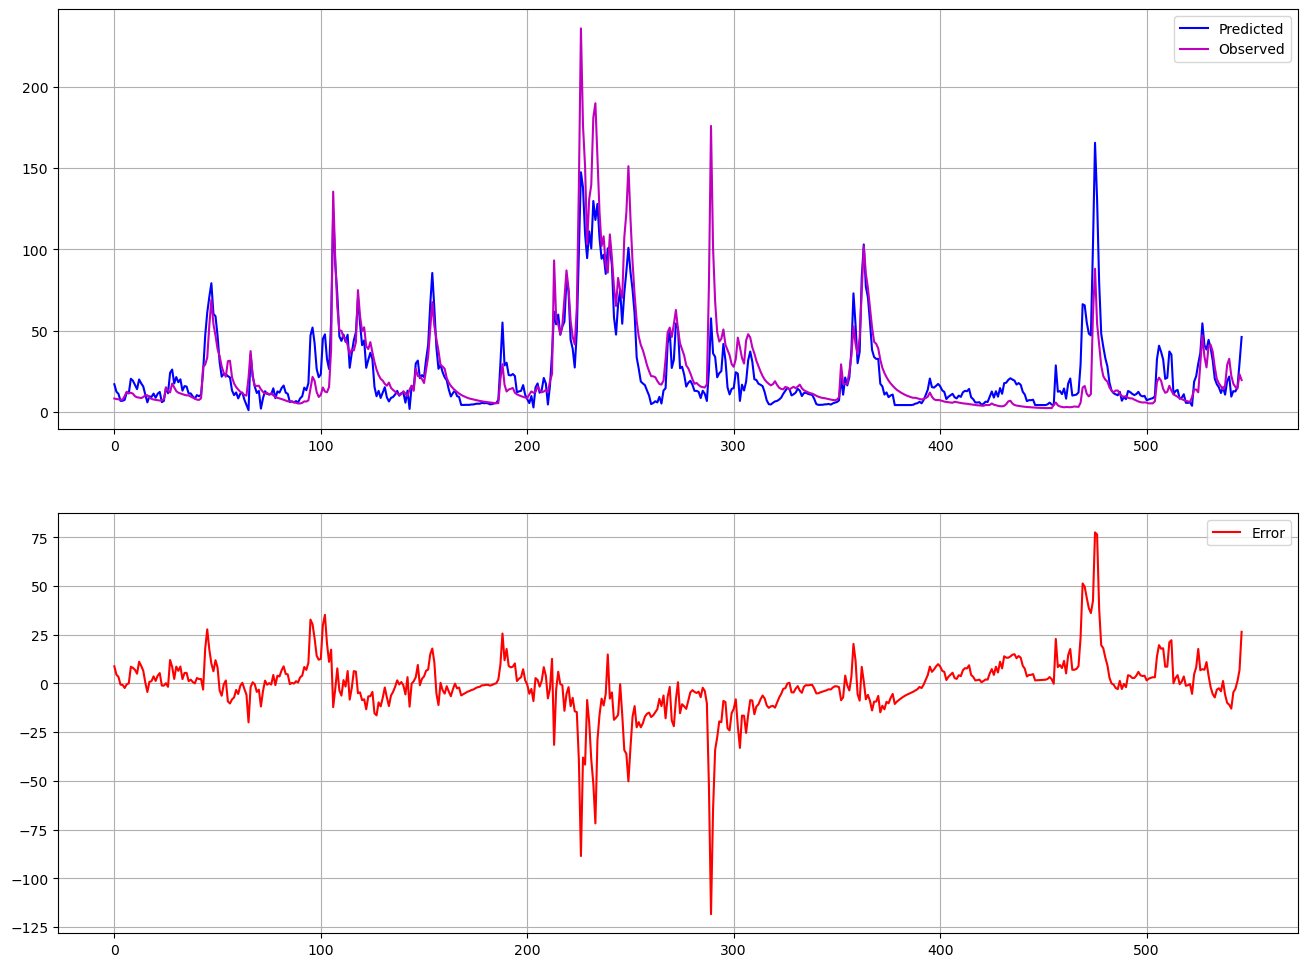

In [353]:
plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)

plt.plot(Y_pred_denorm,'b', label = "Predicted")

plt.plot(Y_obser_denorm , 'm',  label = "Observed")  

plt.legend()
plt.grid()

plt.subplot(2,1,2)

plt.plot(Y_pred_denorm - Y_obser_denorm ,'r', label = "Error")

plt.legend()

plt.grid()

### NSE after denormalization

In [354]:
nse_d = he.evaluator(he.nse, Y_pred_denorm , Y_obser_denorm  )
print(nse_d)

[0.75680404]


### RMSE after denormalization (in m3/sec)

In [355]:
#### rmse in m3/sec
rmse_d = he.evaluator(he.rmse, Y_pred_denorm, Y_obser_denorm)
print(rmse_d)    ### 

[15.10910763]
